<div align="center">
  <h1><b> Quantum Computing </b></h1>
  <h2> Qiskit Little-Endian Convention </h2>
</div>

<br>
<b>Author:</b> <a target="_blank" href="https://github.com/camponogaraviera">Lucas Camponogara Viera</a>

# Table of Contents

- [Qiskit Little-Endian Convention](#qiskit-little-endian-convention)
- [Circuit Example 1](#circuit-example-1)
- [Circuit Example 2](#circuit-example-2)

# &nbsp; <img valign="middle" height="45px" src="https://img.icons8.com/python" width="45" hspace="0px" vspace="0px"> Importing modules

In [1]:
%run implementations.ipynb

{'commit_hash': '786b192',
 'commit_source': 'installation',
 'default_encoding': 'utf-8',
 'ipython_path': '/home/lucas/anaconda3/envs/qc-qiskit/lib/python3.11/site-packages/IPython',
 'ipython_version': '9.7.0',
 'os_name': 'posix',
 'platform': 'Linux-6.8.0-87-generic-x86_64-with-glibc2.35',
 'sys_executable': '/home/lucas/anaconda3/envs/qc-qiskit/bin/python',
 'sys_platform': 'linux',
 'sys_version': '3.11.0 | packaged by conda-forge | (main, Jan 14 2023, '
                '12:27:40) [GCC 11.3.0]'}


# Qiskit Little-Endian Convention

In little-endian convention, higher qubit indices are more significant, i.e, the last qubit (highest register index) is stored first. In qiskit, one reads a circuit in a bottom-up approach, in the sense that a statevector $|abc\rangle$ has quantum registers 0, 1, 2 in states $|c\rangle$, $|b\rangle$, $|a\rangle$, respectively. Example: the state $|100\rangle$, in qiskit, corresponds to a quantum circuit with the top qubit in state $|0\rangle$, the middle qubit in state $|0\rangle$, and the bottom qubit in state $|1\rangle$.

# Circuit Example 1


Consider the following circuit:

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2)) 



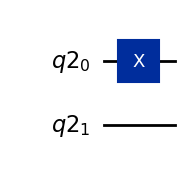

In [4]:
backend = Aer.get_backend('unitary_simulator')
dec = 2                                # Number of decimals for the matrix elements.
qr = QuantumRegister(2)                # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr, name='circuit')
qc.x(0)                                # Apply the Pauli-X gate on qubit 0.
print(Statevector.from_instruction(qc), '\n')
job = backend.run(qc, shots=1024)
result = job.result()
unitary = result.get_unitary(qc, dec)
qc.draw(output='mpl')

In [6]:
array_to_latex(unitary, prefix="\\text{Unitary Matrix = }\n")

<IPython.core.display.Latex object>

In little-endian convention, the circuit above has the following unitary operator:

$$\hat{U} = \mathbb{I} \otimes X.$$

Such that 

$$\hat{U} |00\rangle = (\mathbb{I} \otimes X) (|0\rangle \otimes |0\rangle)=\mathbb{I}|0\rangle \otimes  X |0\rangle=|0\rangle \otimes |1\rangle =|01\rangle = [0,1,0,0].$$

In [7]:
# Operator I⊗X:
np.kron(sigma0, sigma1)

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [8]:
np.kron(sigma0, sigma1)@np.kron(zero,zero).T #(I⊗X)|00>=|01>.

array([[0.],
       [1.],
       [0.],
       [0.]])

In [9]:
np.kron(zero,one).T #|01>.

array([[0],
       [1],
       [0],
       [0]])

# Circuit Example 2

Consider the following circuit:

Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2)) 



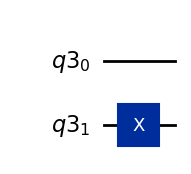

In [10]:
backend = Aer.get_backend('unitary_simulator')
dec = 2                                # Number of decimals for the matrix elements.
qr = QuantumRegister(2)                # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr, name='circuit')
qc.x(1)                                # Apply the Pauli-X gate on qubit 1.
print(Statevector.from_instruction(qc), '\n')
job = backend.run(qc, shots=1024)
result = job.result()
unitary = result.get_unitary(qc, dec)
qc.draw(output='mpl')

In [11]:
array_to_latex(unitary, prefix="\\text{Unitary Matrix = }\n")

<IPython.core.display.Latex object>

In little-endian convention, the circuit above has the following unitary operator:

$$\hat{U} = X \otimes \mathbb{I} .$$

Such that 

$$\hat{U} |00\rangle = ( X \otimes \mathbb{I}) (|0\rangle \otimes |0\rangle)= X|0\rangle \otimes  \mathbb{I} |0\rangle=|1\rangle \otimes |0\rangle =|10\rangle = [0,0,1,0].$$

In [12]:
# Operator X⊗I:
np.kron(sigma1, sigma0) 

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [13]:
np.kron(one,zero).T #|10>.

array([[0],
       [0],
       [1],
       [0]])

# &nbsp; <a href="#"><img valign="middle" height="45px" src="https://img.icons8.com/book" width="45" hspace="0px" vspace="0px"></a> References<a name="ref" />

[1] Nielsen MA, Chuang IL. 2010. Quantum Computation and Quantum Information. New York: [Cambridge Univ. Press.](https://doi.org/10.1017/CBO9780511976667) 10th Anniv. Ed. 